# 일별 데이터 불러오기 (2018.06-09 서울)

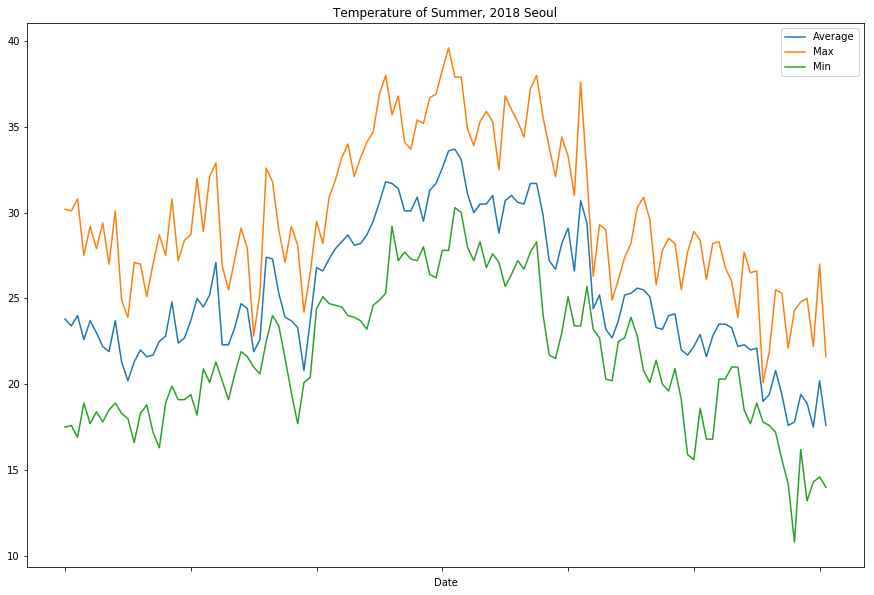

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('kma_2018.csv', encoding='cp949')
df.columns = ['No.', 'Region', 'Date', 'Average', 'Max', 'Max Time', 'Min', 'Min Time']

average = df.iloc[:, [2, 3]]
maximum = df.iloc[:, [2, 4]]
minimum = df.iloc[:, [2, 6]]
df['Date'] = df['Date'].str.replace('2018-', '').str.replace('-','/')

df.plot(x='Date', y=['Average', 'Max', 'Min'], figsize=(15, 10))
plt.title('Temperature of Summer, 2018 Seoul')
plt.savefig('weather0.png', dpi=400, bbox_inches='tight')
plt.show()

## 최고기온 상위 5

In [15]:
df.sort_values(by='Max', ascending=False, axis=0)[['Date', 'Max', 'Max Time']].head()

,Date,Max,Max Time
61,08/01,39.6,15:36
60,07/31,38.3,15:19
75,08/15,38.0,14:17
51,07/22,38.0,15:27
62,08/02,37.9,15:58


## 최저기온 하위 5

In [17]:
df.sort_values(by='Min', ascending=True, axis=0)[['Date', 'Min', 'Min Time']].head()

,Date,Min,Min Time
116,09/25,10.8,06:45
118,09/27,13.2,06:26
121,09/30,14.0,23:12
115,09/24,14.2,05:16
119,09/28,14.3,06:08


# 월별 기온 데이터 불러오기 (1960-2018 서울)

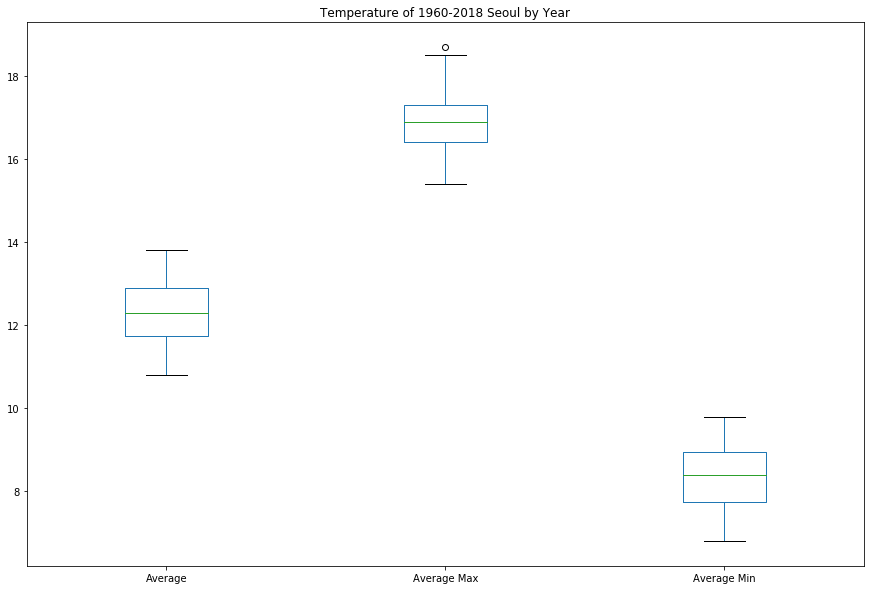

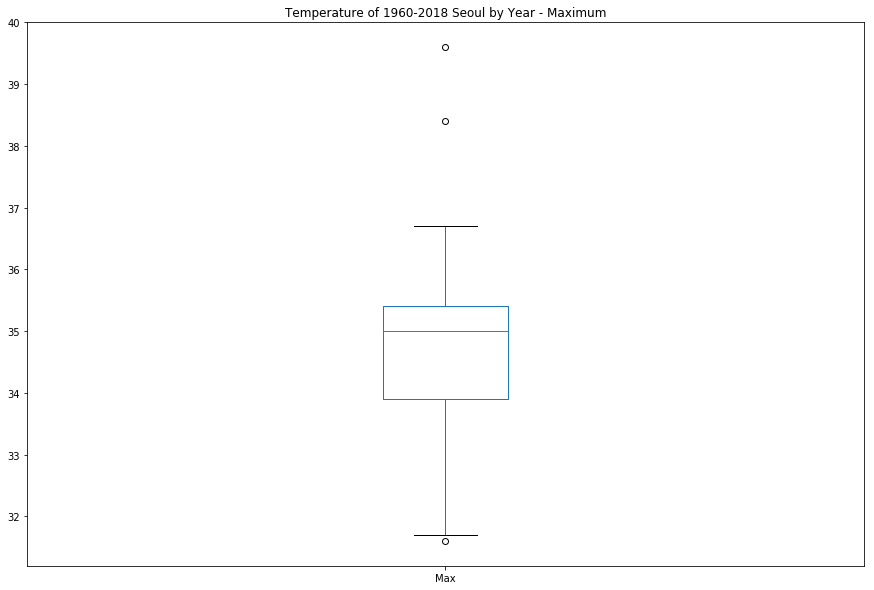

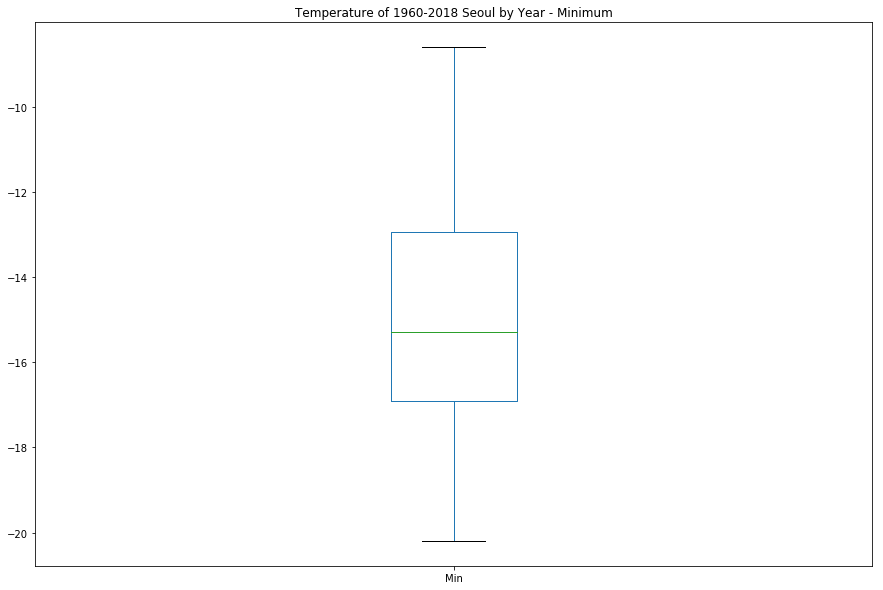

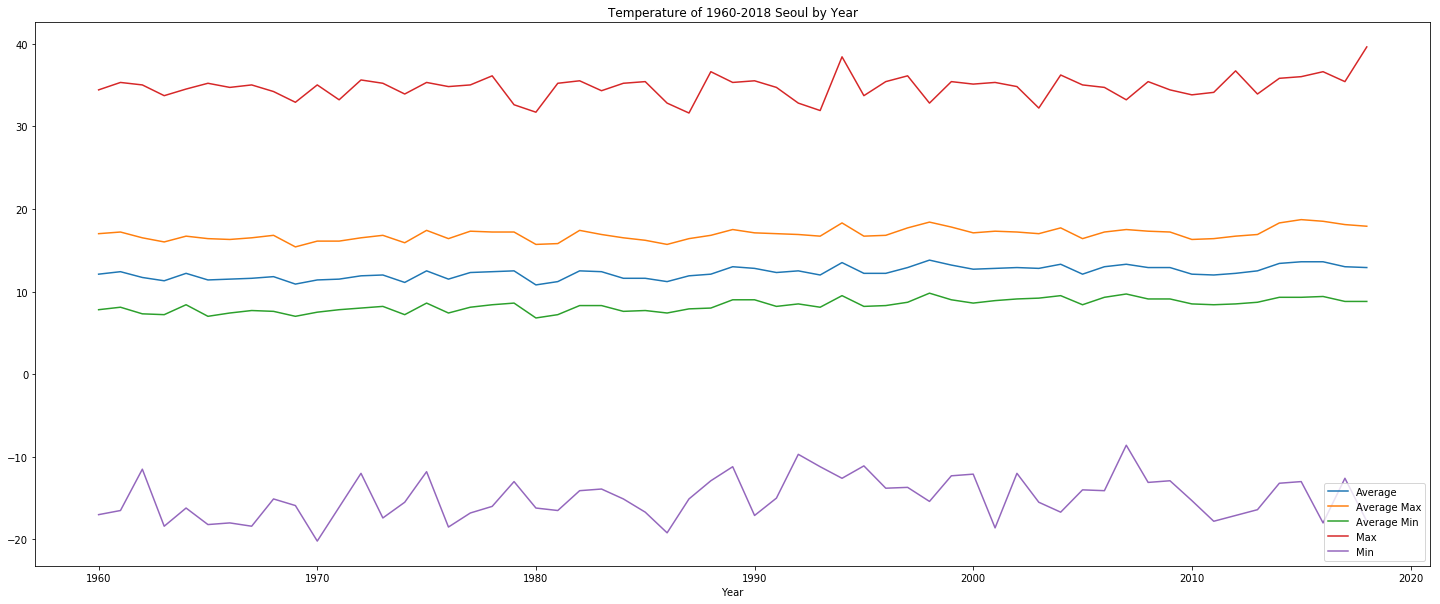

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime
import numpy as np

%matplotlib inline

df = pd.read_csv('kma_1960_year.csv', encoding='cp949')
df.columns = ['No.', 'Region', 'Year', 'Average', 'Average Max', 'Max', 'Max Date', 'Average Min', 'Min', 'Min Date']

df.plot(x='Year', y=['Average', 'Average Max', 'Average Min'], kind='box', figsize=(15, 10))
plt.title('Temperature of 1960-2018 Seoul by Year')
plt.savefig('weather1.png', dpi=400, bbox_inches='tight')
plt.show()

df.plot(x='Year', y='Max', kind='box', figsize=(15, 10))
plt.title('Temperature of 1960-2018 Seoul by Year - Maximum')
plt.savefig('weather2.png', dpi=400, bbox_inches='tight')
plt.show()

df.plot(x='Year', y='Min', kind='box', figsize=(15, 10))
plt.title('Temperature of 1960-2018 Seoul by Year - Minimum')
plt.savefig('weather3.png', dpi=400, bbox_inches='tight')
plt.show()

df.plot(x='Year', y=['Average', 'Average Max', 'Average Min', 'Max', 'Min'], figsize=(25, 10))
plt.title('Temperature of 1960-2018 Seoul by Year')
plt.savefig('weather4.png', dpi=400, bbox_inches='tight')
plt.show()

## 관측 사상 가장 더웠던 날들

In [52]:
df.sort_values(by='Max', ascending=False, axis=0)[['Max Date', 'Max']].head()

,Max Date,Max
58,2018-08-01,39.6
34,1994-07-24,38.4
52,2012-08-05,36.7
56,2016-08-21,36.6
28,1988-08-10,36.6


## 관측 사상 가장 추웠던 날들

In [53]:
df.sort_values(by='Min', ascending=True, axis=0)[['Min Date', 'Min']].head()

,Min Date,Min
10,1970-01-05,-20.2
26,1986-01-05,-19.2
41,2001-01-15,-18.6
16,1976-12-27,-18.5
3,1963-01-23,-18.4


# 기온 양극화 그래프

In [54]:
df['Comparison'] = df.apply (lambda row: row.Max - row.Min, axis=1)
df.sort_values(by='Comparison', ascending=False, axis=0)[['Year', 'Comparison', 'Max', 'Min']].head()

,Year,Comparison,Max,Min
58,2018,57.4,39.6,-17.8
10,1970,55.2,35.0,-20.2
56,2016,54.6,36.6,-18.0
41,2001,53.9,35.3,-18.6
52,2012,53.8,36.7,-17.1


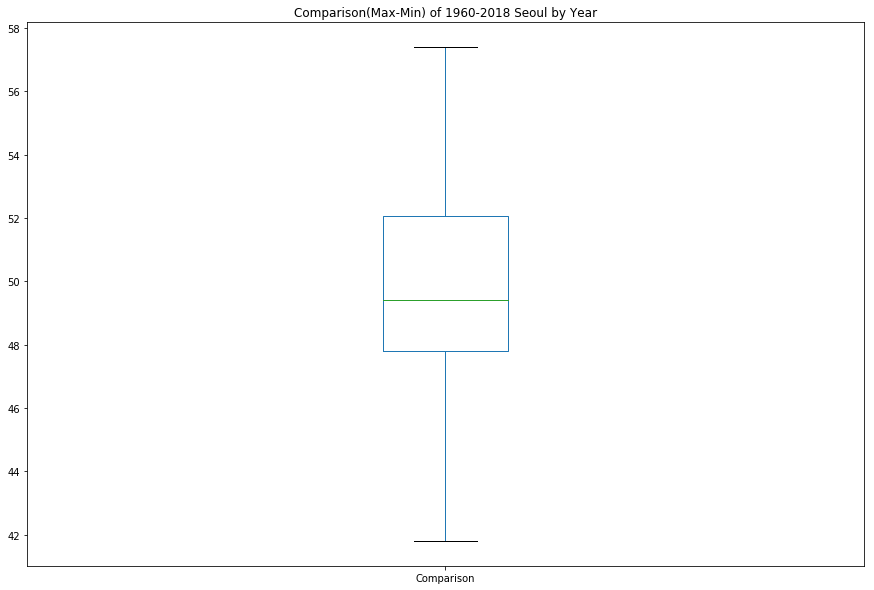

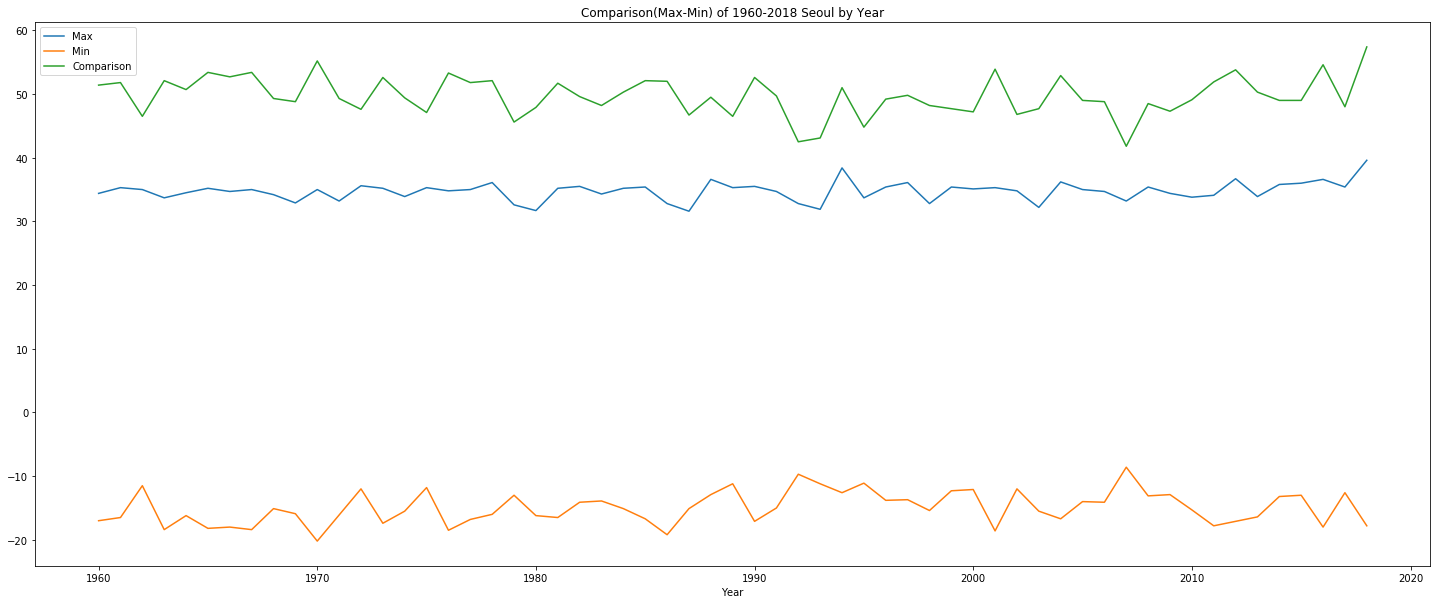

In [55]:
df.plot(x='Year', y=['Comparison'], kind='box', figsize=(15, 10))
plt.title('Comparison(Max-Min) of 1960-2018 Seoul by Year')
plt.savefig('weather5.png', dpi=400, bbox_inches='tight')
plt.show()

df.plot(x='Year', y=['Max', 'Min', 'Comparison'], figsize=(25, 10))
plt.title('Comparison(Max-Min) of 1960-2018 Seoul by Year')
plt.savefig('weather6.png', dpi=400, bbox_inches='tight')
plt.show()